<a href="https://colab.research.google.com/github/mwebberclay/Star_Analysis/blob/main/Star_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv("6 class csv 2.csv")

# Display the first 5 rows
print(df.head())

   Temperature (K)  Luminosity(L/Lo)  Radius(R/Ro)  Absolute magnitude(Mv)  \
0             3068          0.002400        0.1700                   16.12   
1             3042          0.000500        0.1542                   16.60   
2             2600          0.000300        0.1020                   18.70   
3             2800          0.000200        0.1600                   16.65   
4             1939          0.000138        0.1030                   20.06   

   Star type Star color Spectral Class  
0          0        Red              M  
1          0        Red              M  
2          0        Red              M  
3          0        Red              M  
4          0        Red              M  


In [ ]:
# Display the first 5 rows
print(df.head())

# Basic information about the dataset
print(df.info())

# Check for missing values
print(df.isnull().sum())

   Temperature (K)  Luminosity(L/Lo)  Radius(R/Ro)  Absolute magnitude(Mv)  \
0             3068          0.002400        0.1700                   16.12   
1             3042          0.000500        0.1542                   16.60   
2             2600          0.000300        0.1020                   18.70   
3             2800          0.000200        0.1600                   16.65   
4             1939          0.000138        0.1030                   20.06   

   Star type Star color Spectral Class  
0          0        Red              M  
1          0        Red              M  
2          0        Red              M  
3          0        Red              M  
4          0        Red              M  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         240 non-null    int64  
 1   Luminosity(L/Lo) 

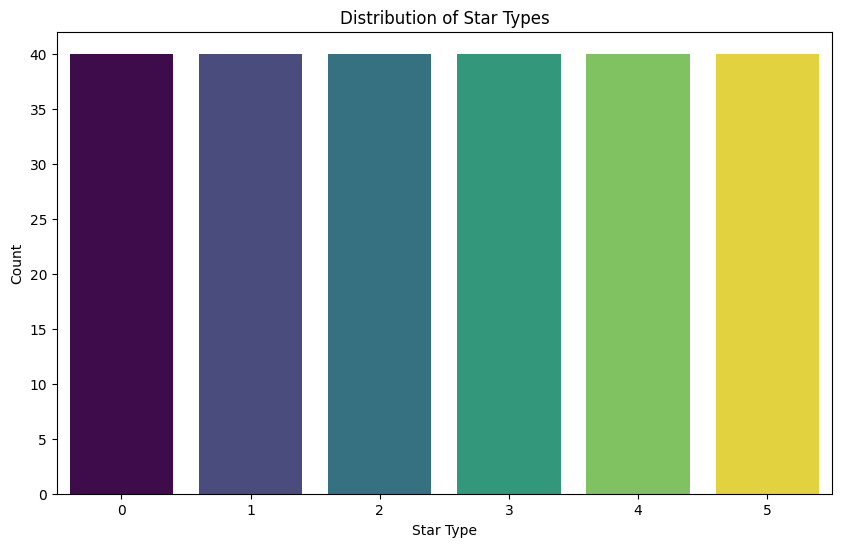

In [ ]:
# Count the number of stars by type
star_type_counts = df['Star type'].value_counts()

# Plot the distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=star_type_counts.index, y=star_type_counts.values, hue=star_type_counts.index, palette='viridis', legend=False)
plt.title("Distribution of Star Types")
plt.xlabel("Star Type")
plt.ylabel("Count")
plt.show()

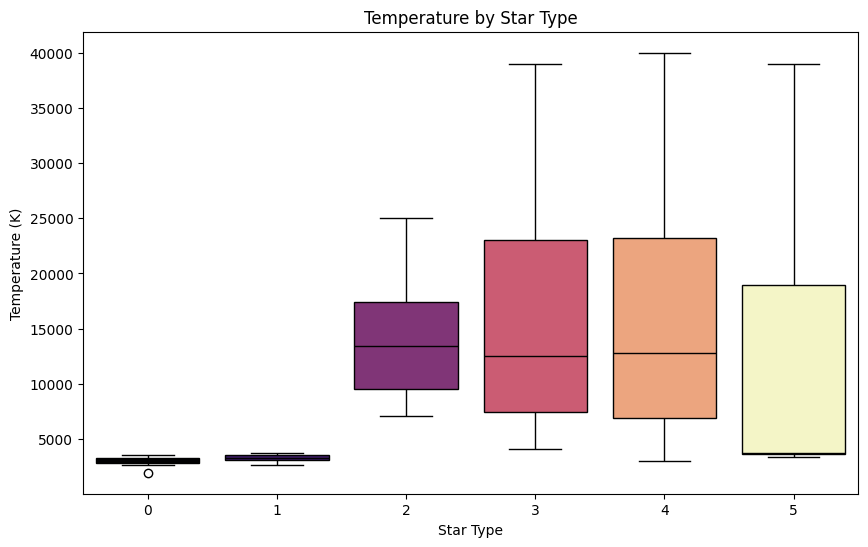

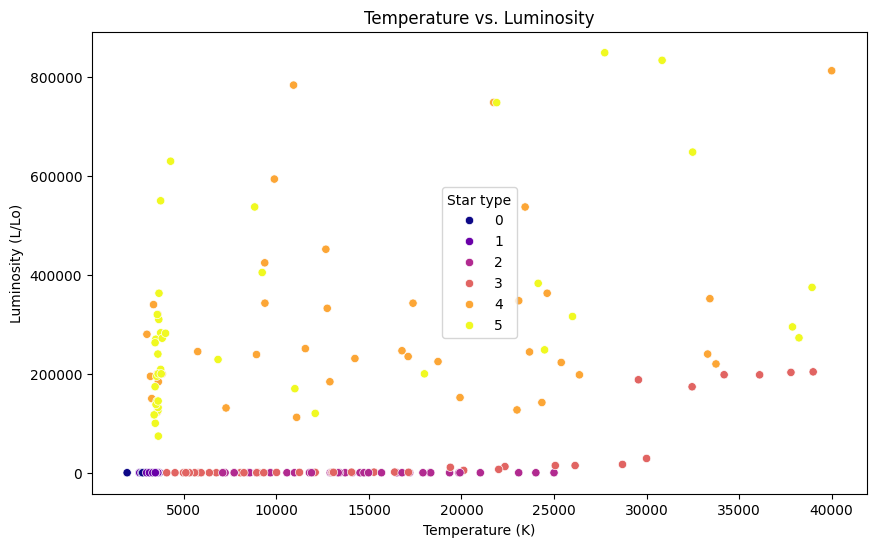

In [22]:
# Box plot of temperature by star type
plt.figure(figsize=(10, 6))

plt.title("Temperature by Star Type")
sns.boxplot(x='Star type', y='Temperature (K)', data=df, hue='Star type', palette='magma', legend=False)
plt.xlabel("Star Type")
plt.ylabel("Temperature (K)")
plt.show()

# Scatter plot of temperature vs. luminosity
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Temperature (K)', y='Luminosity(L/Lo)', hue='Star type', data=df, palette='plasma')
plt.title("Temperature vs. Luminosity")
plt.xlabel("Temperature (K)")
plt.ylabel("Luminosity (L/Lo)")
plt.show()

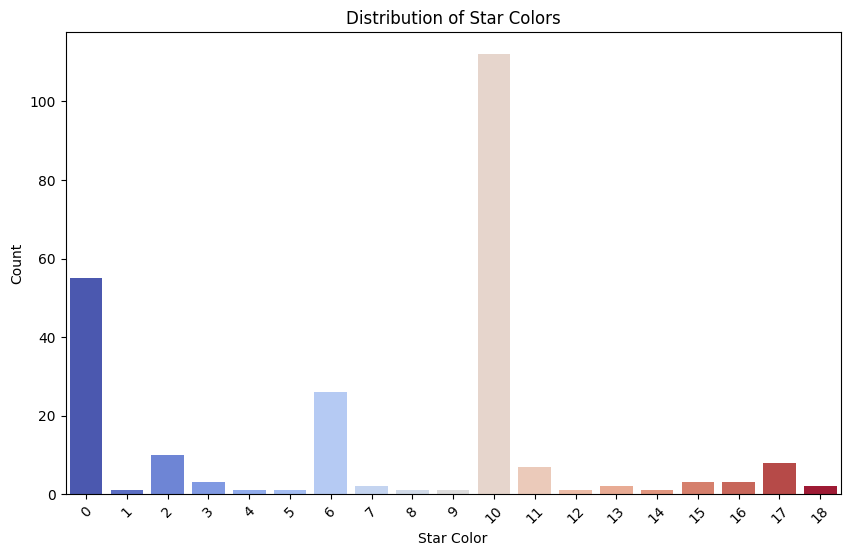

In [27]:
# Count the number of stars by color
star_color_counts = df['Star color'].value_counts()

# Plot the distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=star_color_counts.index, y=star_color_counts.values, hue=star_color_counts.index, palette='coolwarm', legend=False)
plt.title("Distribution of Star Colors")
plt.xlabel("Star Color")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [ ]:
import plotly.express as px

# Scatter plot of temperature vs. luminosity (interactive)
fig = px.scatter(df, x='Temperature (K)', y='Luminosity(L/Lo)', color='Star type', hover_data=['Star color', 'Spectral Class'])
fig.update_layout(title="Interactive Star Map: Temperature vs. Luminosity")
fig.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_csv("6 class csv 2.csv")

# Encode categorical variables
label_encoders = {}
for column in ['Star color', 'Spectral Class']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le  # Save the encoder for later use

# Define features (X) and target (y)
X = df.drop('Star type', axis=1)  # Features
y = df['Star type']  # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the first 5 rows of the training set
print(X_train.head())

     Temperature (K)  Luminosity(L/Lo)  Radius(R/Ro)  Absolute magnitude(Mv)  \
139             3541          0.001300        0.2560                   14.33   
60              3341          0.005600        0.0570                   16.23   
204            18340          0.001340        0.0124                   11.22   
186             2968          0.000461        0.1190                   17.45   
207            23092          0.001320        0.0104                   10.18   

     Star color  Spectral Class  
139          10               5  
60           10               5  
204           0               1  
186          10               5  
207           0               1  


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize the model
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         8
           5       1.00      1.00      1.00        11

    accuracy                           1.00        48
   macro avg       1.00      1.00      1.00        48
weighted avg       1.00      1.00      1.00        48



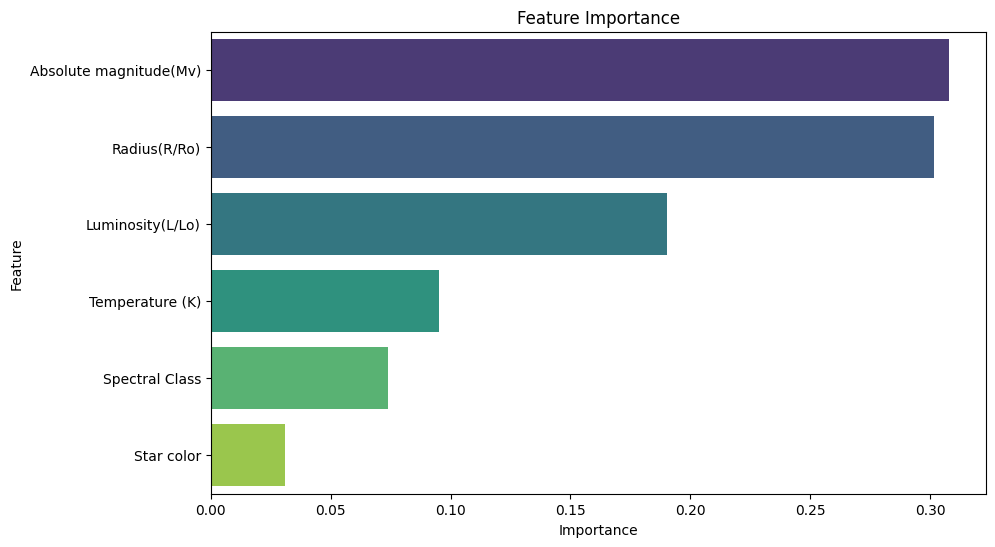

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances
importances = model.feature_importances_
feature_names = X.columns

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, hue='Feature', palette='viridis', legend=False)
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

First 5 rows of the dataset:
   Temperature (K)  Luminosity(L/Lo)  Radius(R/Ro)  Absolute magnitude(Mv)  \
0             3068          0.002400        0.1700                   16.12   
1             3042          0.000500        0.1542                   16.60   
2             2600          0.000300        0.1020                   18.70   
3             2800          0.000200        0.1600                   16.65   
4             1939          0.000138        0.1030                   20.06   

   Star type Star color Spectral Class  
0          0        Red              M  
1          0        Red              M  
2          0        Red              M  
3          0        Red              M  
4          0        Red              M  

Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)    

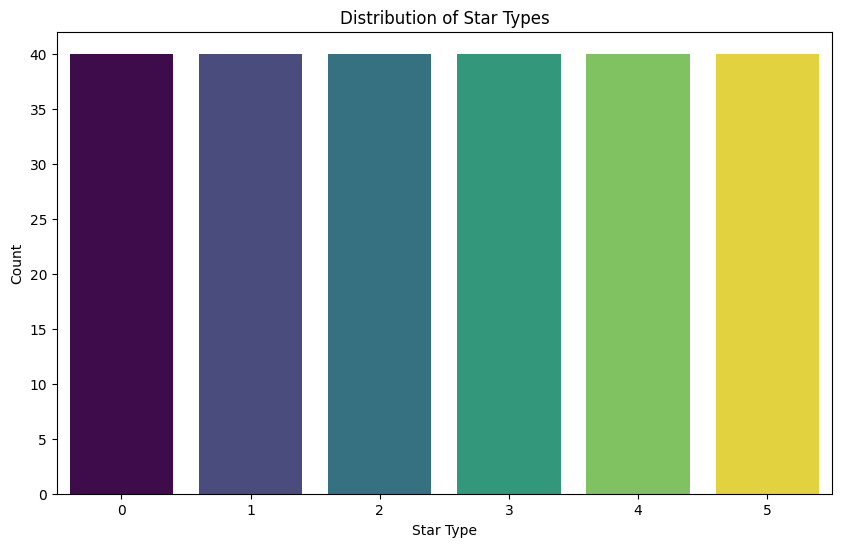

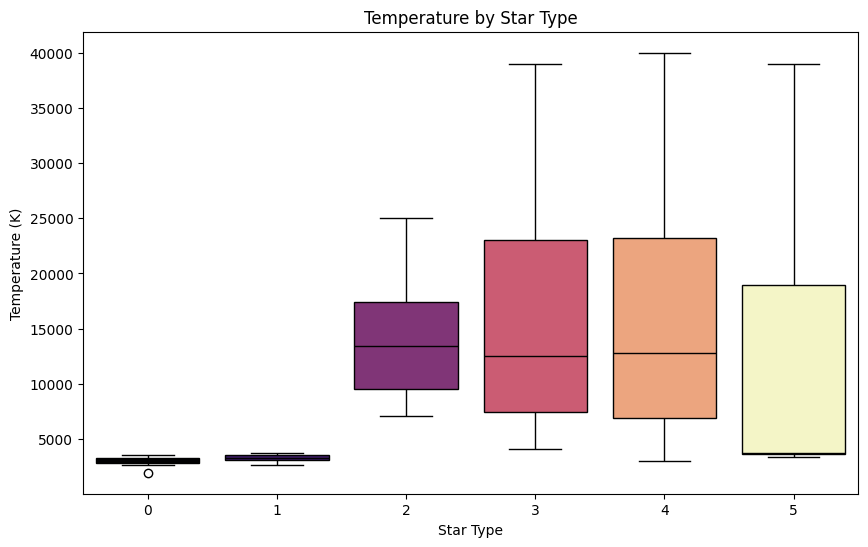

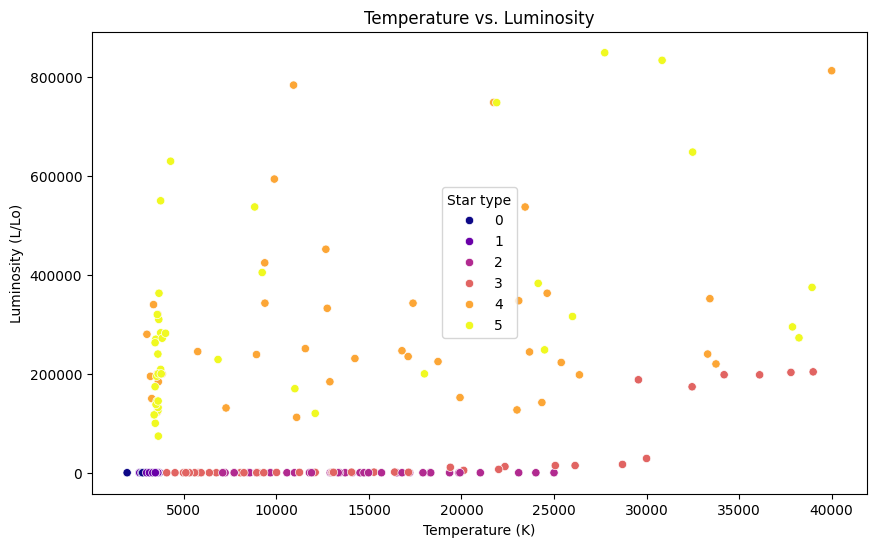


Model Evaluation:
Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         8
           5       1.00      1.00      1.00        11

    accuracy                           1.00        48
   macro avg       1.00      1.00      1.00        48
weighted avg       1.00      1.00      1.00        48



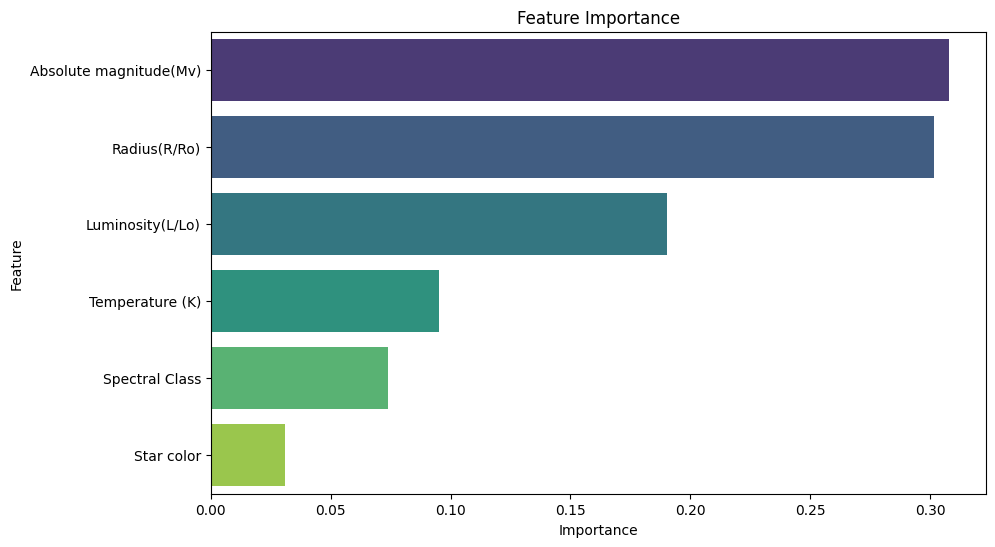

In [25]:
# Step 1: Data Loading and Exploration
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("6 class csv 2.csv")

# Display the first 5 rows
print("First 5 rows of the dataset:")
print(df.head())

# Basic information about the dataset
print("\nDataset information:")
print(df.info())

# Check for missing values
print("\nMissing values in the dataset:")
print(df.isnull().sum())

# Step 2: Data Visualization
# Count the number of stars by type
star_type_counts = df['Star type'].value_counts()

# Plot the distribution of star types
plt.figure(figsize=(10, 6))
sns.barplot(x=star_type_counts.index, y=star_type_counts.values, hue=star_type_counts.index, palette='viridis', legend=False)
plt.title("Distribution of Star Types")
plt.xlabel("Star Type")
plt.ylabel("Count")
plt.show()

# Box plot of temperature by star type
plt.figure(figsize=(10, 6))
sns.boxplot(x='Star type', y='Temperature (K)', data=df, hue='Star type', palette='magma', legend=False)
plt.title("Temperature by Star Type")
plt.xlabel("Star Type")
plt.ylabel("Temperature (K)")
plt.show()

# Scatter plot of temperature vs. luminosity
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Temperature (K)', y='Luminosity(L/Lo)', hue='Star type', data=df, palette='plasma')
plt.title("Temperature vs. Luminosity")
plt.xlabel("Temperature (K)")
plt.ylabel("Luminosity (L/Lo)")
plt.show()

# Step 3: Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Encode categorical variables
label_encoders = {}
for column in ['Star color', 'Spectral Class']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le  # Save the encoder for later use

# Define features (X) and target (y)
X = df.drop('Star type', axis=1)  # Features
y = df['Star type']  # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("\nModel Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Step 4: Visualize Feature Importance
importances = model.feature_importances_
feature_names = X.columns

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, hue='Feature', palette='viridis', legend=False)
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()